In [23]:
import numpy as np
import matplotlib.pyplot as plt

p = lambda x: -2/x
q = lambda x: 2/(x**2)
r = lambda x: np.sin(np.log(x))/(x**2)

f = lambda x, y1, y2: ( 32 + 2 * x**3 - y1 * y2 ) / 8.0
f1 = lambda x, y1, y2: - y2 / 8.0
f2 = lambda x, y1, y2: - y1 / 8.0

**Shooting Linear**

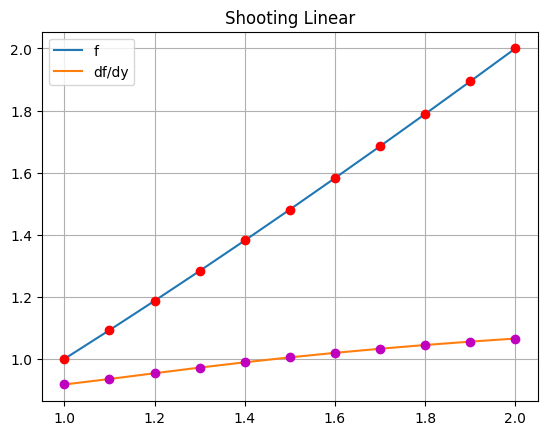

In [24]:
def runge_kutta_l(x, h, u1, u2, v1, v2, p, q, r):

    k1u1 = h * u2
    k1u2 = h * (p(x) * u2 + q(x) * u1 + r(x))
    k1v1 = h * v2
    k1v2 = h * (p(x) * v2 + q(x) * v1)
    
    k2u1 = h * (u2 + 0.5 * k1u2)
    k2u2 = h * (p(x + h / 2) * (u2 + 0.5 * k1u2) + q(x + h / 2) * (u1 + 0.5 * k1u1) + r(x + h / 2))
    k2v1 = h * (v2 + 0.5 * k1v2)
    k2v2 = h * (p(x + h / 2) * (v2 + 0.5 * k1v2) + q(x + h / 2) * (v1 + 0.5 * k1v1))
    
    k3u1 = h * (u2 + 0.5 * k2u2)
    k3u2 = h * (p(x + h / 2) * (u2 + 0.5 * k2u2) + q(x + h / 2) * (u1 + 0.5 * k2u1) + r(x + h / 2))
    k3v1 = h * (v2 + 0.5 * k2v2)
    k3v2 = h * (p(x + h / 2) * (v2 + 0.5 * k2v2) + q(x + h / 2) * (v1 + 0.5 * k2v1))
    
    k4u1 = h * (u2 + k3u2)
    k4u2 = h * (p(x + h) * (u2 + k3u2) + q(x + h) * (u1 + k3u1) + r(x + h))
    k4v1 = h * (v2 + k3v2)
    k4v2 = h * (p(x + h) * (v2 + k3v2) + q(x + h) * (v1 + k3v1))
    
    return k1u1, k1u2, k1v1, k1v2, k2u1, k2u2, k2v1, k2v2, k3u1, k3u2, k3v1, k3v2, k4u1, k4u2, k4v1, k4v2

def linear_shooting(a, b, alpha, beta, p, q, r, N = 10):
    h = (b - a) / N
    
    u1 = np.zeros(N + 1)
    u2 = np.zeros(N + 1)
    v1 = np.zeros(N + 1)
    v2 = np.zeros(N + 1)
    
    u1[0] = alpha
    u2[0] = 0
    v1[0] = 0
    v2[0] = 1
    
    for i in range(N):
        x = a + i * h
        
        k1u1, k1u2, k1v1, k1v2, k2u1, k2u2, k2v1, k2v2, k3u1, k3u2, k3v1, k3v2, k4u1, k4u2, k4v1, k4v2 = runge_kutta_l(x, h, u1[i], u2[i], v1[i], v2[i], p, q, r)
        
        u1[i + 1] = u1[i] + (1/6) * (k1u1 + 2*k2u1 + 2*k3u1 + k4u1)
        u2[i + 1] = u2[i] + (1/6) * (k1u2 + 2*k2u2 + 2*k3u2 + k4u2)
        v1[i + 1] = v1[i] + (1/6) * (k1v1 + 2*k2v1 + 2*k3v1 + k4v1)
        v2[i + 1] = v2[i] + (1/6) * (k1v2 + 2*k2v2 + 2*k3v2 + k4v2)
    
    w = (beta - u1[N]) / v1[N]
    
    w1 = np.zeros(N + 1)
    w2 = np.zeros(N + 1)
    
    for i in range(N + 1):
        w1[i] = u1[i] + w * v1[i]
        w2[i] = u2[i] + w * v2[i]

    x = np.linspace(a, b, N+1)

    return x, w1, w2

a ,b = 1, 2  
ya, yb = 1, 2 

x, w1, w2 = linear_shooting(a, b, ya, yb, p, q, r)

plt.title("Shooting Linear")
plt.plot(x, w1, label = 'f')
plt.plot(x, w1, 'ro')
plt.plot(x, w2, label = 'df/dy')
plt.plot(x, w2, 'mo')
plt.legend()
plt.grid()
plt.show()

**Shooting Não-Linear**

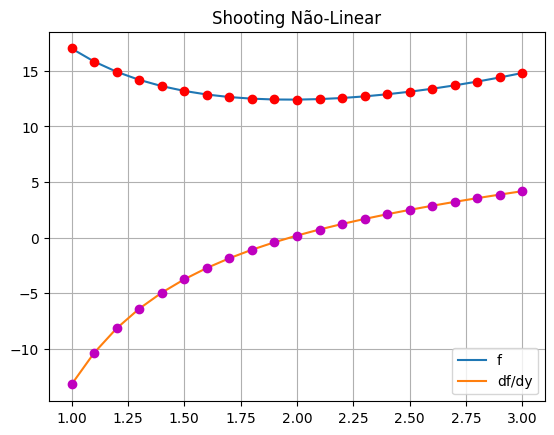

In [25]:
def runge_kutta_nl(f, h, x, w1, w2, u1, u2):
    k1_1 = h * w2
    k1_2 = h * f(x, w1, w2)

    k2_1 = h * (w2 + k1_2 / 2)
    k2_2 = h * f(x + h / 2, w1 + k1_1 / 2, w2 + k1_2 / 2)

    k3_1 = h * (w2 + k2_2 / 2)
    k3_2 = h * f(x + h / 2, w1 + k2_1 / 2, w2 + k2_2 / 2)

    k4_1 = h * (w2 + k3_2)
    k4_2 = h * f(x + h, w1 + k3_1, w2 + k3_2)

    w1_next = w1 + (k1_1 + 2 * k2_1 + 2 * k3_1 + k4_1) / 6
    w2_next = w2 + (k1_2 + 2 * k2_2 + 2 * k3_2 + k4_2) / 6

    k1_3 = h * u2
    k1_4 = h * f(x, u1, u2)

    k2_3 = h * (u2 + k1_4 / 2)
    k2_4 = h * f(x + h / 2, u1 + k1_3 / 2, u2 + k1_4 / 2)

    k3_3 = h * (u2 + k2_4 / 2)
    k3_4 = h * f(x + h / 2, u1 + k2_3 / 2, u2 + k2_4 / 2)

    k4_3 = h * (u2 + k3_4)
    k4_4 = h * f(x + h, u1 + k3_3, u2 + k3_4)

    u1_next = u1 + (k1_3 + 2 * k2_3 + 2 * k3_3 + k4_3) / 6
    u2_next = u2 + (k1_4 + 2 * k2_4 + 2 * k3_4 + k4_4) / 6

    return w1_next, w2_next, u1_next, u2_next

def non_linear_shooting(f, a, b, alpha, beta, N = 20, e = 1e-5, M = 50):
    h = (b - a) / N
    TK = (beta - alpha) / (b - a)

    x_values = np.linspace(a, b, N + 1)
    
    w1_values = np.zeros(N + 1)
    w2_values = np.zeros(N + 1)

    for k in range(M):
        x = a
        w1 = alpha
        w2 = TK
        u1 = 0
        u2 = 1

        w1_values[0] = w1
        w2_values[0] = w2

        for i in range(1, N + 1):
            w1, w2, u1, u2 = runge_kutta_nl(f, h, x, w1, w2, u1, u2)
            x += h
            w1_values[i] = w1
            w2_values[i] = w2

        if abs(w1 - beta) <= e: break

        TK = TK - (w1 - beta) / u1

    return x_values, w1_values, w2_values

a, b = 1, 3
ya, yb = 17, 43/3

x, w1, w2 = non_linear_shooting(f, a, b, ya, yb)

plt.title("Shooting Não-Linear")
plt.plot(x, w1, label = 'f')
plt.plot(x, w1, 'ro')
plt.plot(x, w2, label = 'df/dy')
plt.plot(x, w2, 'mo')
plt.legend()
plt.grid()
plt.show()


**Diferenças Finitas Linear**

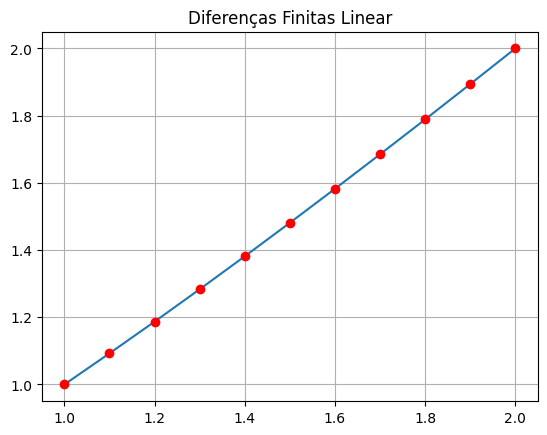

In [26]:
def linear_finite_dif(a, b, alpha, beta, p, q, r, N = 9):
    h = (b - a) / (N + 1)

    A = np.zeros(N+1)
    B = np.zeros(N+1)
    C = np.zeros(N+1)
    D = np.zeros(N+1)
    
    x = a + h

    A[1] = 2 + h**2 * q(x)
    B[1] = -1 + (h / 2) * p(x)
    D[1] = -h**2 * r(x) + (1 + (h / 2) * p(x)) * alpha

    for i in range(2, N):
        x = a + i * h
        A[i] = 2 + h**2 * q(x)
        B[i] = -1 + (h / 2) * p(x)
        C[i] = -1 - (h / 2) * p(x)
        D[i] = -h**2 * r(x)
    
    x = b - h
    A[N] = 2 + h**2 * q(x)
    C[N] = -1 - (h / 2) * p(x)
    D[N] = -h**2 * r(x) + (1 - (h / 2) * p(x)) * beta

    L = np.zeros(N+1)
    U = np.zeros(N+1)
    Z = np.zeros(N+1)

    L[1] = A[1]
    U[1] = B[1] / L[1]
    Z[1] = D[1] / L[1]

    for i in range(2, N):
        L[i] = A[i] - C[i] * U[i-1]
        U[i] = B[i] / L[i]
        Z[i] = (D[i] - C[i] * Z[i-1]) / L[i]

    L[N] = A[N] - C[N] * U[N-1]
    Z[N] = (D[N] - C[N] * Z[N-1]) / L[N]

    W = np.zeros(N+2)
    W[N] = Z[N]
    W[N+1] = beta  
    for i in range(N-1, 0, -1):
        W[i] = Z[i] - U[i] * W[i+1]
    
    W[0] = alpha

    X = np.linspace(a, b, N+2)
    return X, W

a, b = 1, 2
ya, yb = 1, 2

x, w = linear_finite_dif(a, b, ya, yb, p, q, r)

plt.title("Diferenças Finitas Linear")
plt.plot(x, w)
plt.plot(x, w, 'ro')
plt.grid()
plt.show()




**Diferenças Finitas Não-Linear**

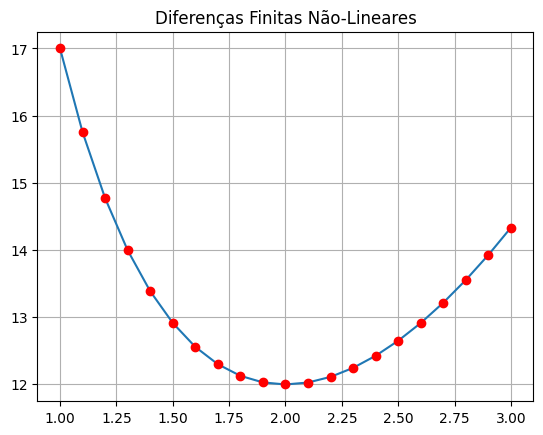

In [27]:
def non_linear_finite_dif_diagonal(f, a, b, alpha, beta, e=1e-5, N=19, max_i=100):
    h = (b - a) / (N + 1)

    w = np.zeros(N + 2)
    w[0] = alpha
    w[N + 1] = beta
    
    for i in range(1, N + 1):
        w[i] = alpha + i * h * (beta - alpha) / (b - a)

    k = 1
    while k <= max_i:
        A = np.zeros((N, N))
        d = np.zeros(N)  

        x = a + h
        t = (w[2] - alpha) / (2 * h)
        A[0, 0] = 2 + (h ** 2) * f(x, w[1], t)
        A[0, 1] = -1
        d[0] = -(2 * w[1] - w[2] - alpha + (h**2) * f(x, w[1], t))

        for i in range(1, N - 1):
            x = a + (i + 1) * h
            t = (w[i + 2] - w[i]) / (2 * h)
            A[i, i - 1] = -1
            A[i, i] = 2 + h ** 2 * f(x, w[i + 1], t)
            A[i, i + 1] = -1
            d[i] = -(2 * w[i + 1] - w[i + 2] - w[i] + (h**2) * f(x, w[i + 1], t))

        x = b - h
        t = (beta - w[N - 1]) / (2 * h)
        A[N - 1, N - 2] = -1
        A[N - 1, N - 1] = 2 + (h**2) * f(x, w[N], t)
        d[N - 1] = -(2 * w[N] - w[N - 1] - beta + (h**2) * f(x, w[N], t))

        v = np.linalg.solve(A, d)

        for i in range(1, N + 1):
            w[i] += v[i - 1]

        if np.linalg.norm(v) <= e: break

        k += 1

    x_vals = np.linspace(a, b, N + 2)
    return x_vals, w

a, b = 1, 3
ya, yb = 17, 43 / 3

x, w = non_linear_finite_dif_diagonal(f, a, b, ya, yb)

plt.title("Diferenças Finitas Não-Lineares")
plt.plot(x, w)
plt.plot(x, w, 'ro')
plt.grid()
plt.show()


**Rayleigh-Ritz Linear por Partes**

In [28]:
def Phi():
    return

def Qs(n, x, h, f, p, q):
    Q = np.zeros((7,n+2))

    for i in range(1,n):
        Q[1, i] = (h[i] / 12) * (q(x[i]) + q(x[i+1]))
        Q[2, i] = (h[i-1] / 12) * (3 * q(x[i]) + q(x[i-1]))
        Q[3, i] = (h[i] / 12) * (3 * q(x[i]) + q(x[i+1]))
        Q[4, i] = (1 / (2 * h[i-1])) * (p(x[i]) + p(x[i-1]))
        Q[5, i] = (h[i-1] / 6) * (2 * f(x[i]) + f(x[i-1]))
        Q[6, i] = (h[i] / 6) * (2 * f(x[i]) + f(x[i+1]))
    
    Q[2, n] = (h[n-1] / 12) * (3 * q(x[n]) + q(x[n-1]))
    Q[3, n] = (h[n] / 12) * (3 * q(x[n]) + q(x[n+1]))
    Q[4, n] = (1 / (2 * h[n-1])) * (p(x[n]) + p(x[n-1]))
    Q[4, n+1] = (1 / (2 * h[n])) * (p(x[n+1]) + p(x[n]))
    Q[5, n] = (h[n-1] / 6) * (2 * f(x[n]) + f(x[n-1]))
    Q[6, n] = (h[n] / 6) * (2 * f(x[n]) + f(x[n+1]))
    
    return Q

def rayleigh_ritz(n, f, p, q):
    x = np.linspace(0, 1, n+2)
    h = np.zeros(n+1)

    alpha = np.zeros(n+1)
    beta = np.zeros(n+1)
    b = np.zeros(n+1)

    for i in range(n+1):
        h[i] = x[i+1] - x[i]
    
    for i in range(1,n+1):
        phi = Phi()

    Q = np.zeros((7,n+2))
    Q = Qs(n, x, h, f, p, q)
    
    for i in range(1, n):
        alpha[i] = Q[4, i] + Q[4, i+1] + Q[2, i] + Q[3, i]
        beta[i] = Q[1, i] - Q[4, i+1]
        b[i] = Q[5, i] + Q[6, i]
    
    alpha[n] = Q[4, n] + Q[4, n+1] + Q[2, n] + Q[3, n]
    b[n] = Q[5, n] + Q[6, n]

    a = np.zeros(n+1)
    s = np.zeros(n+1)
    z = np.zeros(n+1)
    c = np.zeros(n+1)

    a[1] = alpha[1]
    s[1] = beta[1] / alpha[1]
    z[1] = b[1] / a[1]

    for i in range(2, n):
        a[i] = alpha[i] - beta[i-1] * s[i-1]
        s[i] = beta[i] / a[i]
        z[i] = (b[i] - beta[i-1] * z[i-1]) / a[i]

    a[n] = alpha[n] - beta[n-1] * s[n-1]
    z[n] = (b[n] - beta[n-1] * z[n-1]) / a[n]

    c[n] = z[n]

    for i in range(n-1, 0, -1):
        c[i] = z[i] - s[i] * c[i+1]

    return x, c

f = lambda x: 2*(np.pi**2) * np.sin(np.pi * x)
p = lambda x: 1
q = lambda x: np.pi**2

n = 9  # Número de nós
x, c = rayleigh_ritz(n, f, p, q)

print(x)
print(c)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.         0.30774731 0.58537018 0.80569293 0.94714884 0.99589123
 0.94714884 0.80569293 0.58537018 0.30774731]
